<a href="https://colab.research.google.com/github/VuMaiTuan/20144483-VuMaiTuan/blob/main/Tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Nhan dang tien

/content/drive/.shortcut-targets-by-id/15xUbZeyFOteT28CXKsU1upr6KhPLFZ1H/Nhan dang tien


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Nhan dang tien/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 988 images belonging to 11 classes.


In [6]:
  validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Nhan dang tien/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 115 images belonging to 11 classes.


In [7]:
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [8]:
validation.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=500,batch_size=128,verbose=1, validation_data=validation)

Epoch 1/500
31/31 [==============================] - 233s 7s/step - loss: 3.7959 - accuracy: 0.1043 - val_loss: 2.3638 - val_accuracy: 0.1565
Epoch 2/500
31/31 [==============================] - 20s 630ms/step - loss: 2.3374 - accuracy: 0.1123 - val_loss: 2.4172 - val_accuracy: 0.1043
Epoch 3/500
31/31 [==============================] - 21s 669ms/step - loss: 2.2895 - accuracy: 0.1457 - val_loss: 2.4843 - val_accuracy: 0.1565
Epoch 4/500
31/31 [==============================] - 19s 626ms/step - loss: 2.2868 - accuracy: 0.1468 - val_loss: 2.3791 - val_accuracy: 0.1130
Epoch 5/500
31/31 [==============================] - 21s 676ms/step - loss: 2.2725 - accuracy: 0.1812 - val_loss: 2.3177 - val_accuracy: 0.1304
Epoch 6/500
31/31 [==============================] - 19s 627ms/step - loss: 2.1844 - accuracy: 0.1842 - val_loss: 2.5334 - val_accuracy: 0.2087
Epoch 7/500
31/31 [==============================] - 21s 665ms/step - loss: 2.1647 - accuracy: 0.2095 - val_loss: 2.2632 - val_accuracy: 0

In [12]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.023805318400263786
Train Accuracy 0.9919028282165527


<function matplotlib.pyplot.show(*args, **kw)>

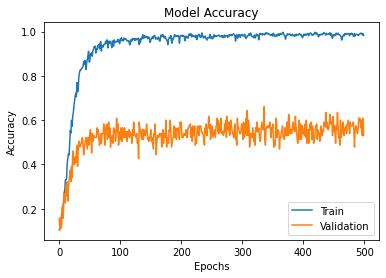

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [37]:
%cd /content/drive/MyDrive/Colab Notebooks/Nhan dang tien 2

/content/drive/MyDrive/Colab Notebooks/Nhan dang tien 2


In [35]:
model.save("Tien.h5")

1/1 [==============================] - 0s 27ms/step
HAI NGAN DONG


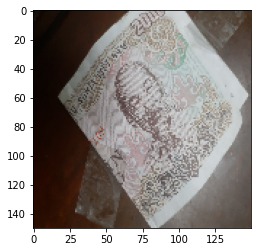

1/1 [==============================] - 0s 28ms/step
HAI NGAN DONG


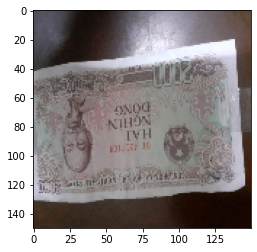

1/1 [==============================] - 0s 28ms/step
MUOI NGAN DONG


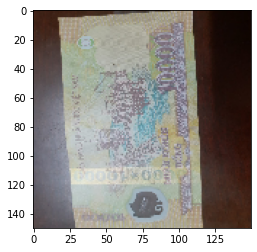

1/1 [==============================] - 0s 16ms/step
MOT NGAN DONG


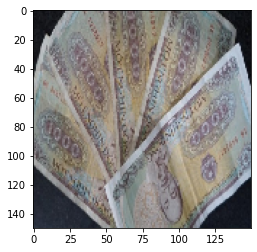

1/1 [==============================] - 0s 20ms/step
MUOI NGAN DONG


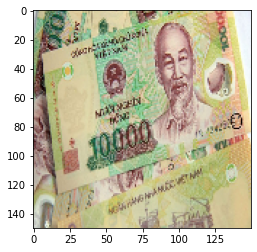

1/1 [==============================] - 0s 18ms/step
HAI CHUC NGAN DONG


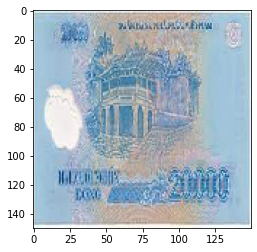

1/1 [==============================] - 0s 18ms/step
HAI TRAM NGAN DONG


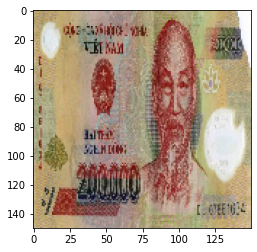

1/1 [==============================] - 0s 15ms/step
NAM TRAM NGAN DONG


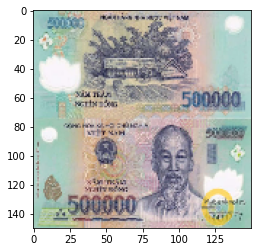

1/1 [==============================] - 0s 16ms/step
NAM TRAM DONG


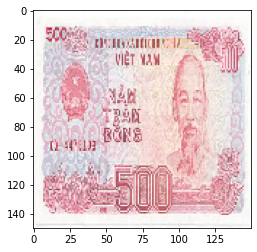

1/1 [==============================] - 0s 18ms/step
NAM NGAN DONG


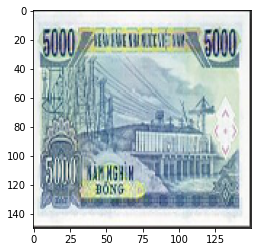

1/1 [==============================] - 0s 16ms/step
MOT TRAM NGAN DONG


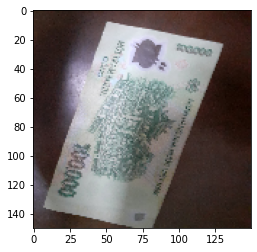

In [38]:
test="/content/drive/MyDrive/Colab Notebooks/Nhan dang tien 2/Test"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model.predict(img)
  if round(result[0][0])==1:
    prediction='MOT TRAM NGAN DONG'
  if round(result[0][1])==1:
    prediction='MUOI NGAN DONG'
  if round(result[0][2])==1:
    prediction='MOT NGAN DONG'
  if round(result[0][3])==1:
    prediction='HAI TRAM NGAN DONG'
  if round(result[0][4])==1:
    prediction='HAI TRAM DONG'
  if round(result[0][5])==1:
    prediction='HAI CHUC NGAN DONG'
  if round(result[0][6])==1:
    prediction='HAI NGAN DONG'
  if round(result[0][7])==1:
    prediction='NAM TRAM NGAN DONG'
  if round(result[0][8])==1:
    prediction='NAM TRAM DONG'
  if round(result[0][9])==1:
    prediction='NAM CHUC NGAN DONG'
  if round(result[0][10])==1:
    prediction='NAM NGAN DONG'
  print(prediction)
  plt.show()